In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import fastf1 as f1
from ing_theme_matplotlib import mpl_style
import mplcyberpunk
from fastf1 import plotting

In [2]:
f1.Cache.enable_cache('../cache')

*Qualifying*

In [4]:
quali = f1.get_session(2024,"Monza","Qualifying")
quali.load()

core           INFO 	Loading data for Italian Grand Prix - Qualifying [v3.3.9]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for _extended_timing_data. Loading data...
_api           INFO 	Fetching timing data...
_api           INFO 	Parsing timing data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for timing_app_data. Loading data...
_api           INFO 	Fetching timing app data...
req            INFO 	Data has been written to cache!
core           INFO 	Process

In [5]:
quali.session_info

{'Meeting': {'Key': 1244,
  'Name': 'Italian Grand Prix',
  'OfficialName': 'FORMULA 1 PIRELLI GRAN PREMIO D’ITALIA 2024',
  'Location': 'Monza',
  'Country': {'Key': 13, 'Code': 'ITA', 'Name': 'Italy'},
  'Circuit': {'Key': 39, 'ShortName': 'Monza'}},
 'ArchiveStatus': {'Status': 'Generating'},
 'Key': 9586,
 'Type': 'Qualifying',
 'Name': 'Qualifying',
 'StartDate': datetime.datetime(2024, 8, 31, 16, 0),
 'EndDate': datetime.datetime(2024, 8, 31, 17, 0),
 'GmtOffset': datetime.timedelta(seconds=7200),
 'Path': '2024/2024-09-01_Italian_Grand_Prix/2024-08-31_Qualifying/'}

In [6]:
quali.results.loc[:,["Abbreviation","TeamName","GridPosition","Position","Time","Status"]]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
4,NOR,McLaren,NaN,1.0,NaT,
81,PIA,McLaren,NaN,2.0,NaT,
63,RUS,Mercedes,NaN,3.0,NaT,
16,LEC,Ferrari,NaN,4.0,NaT,
55,SAI,Ferrari,NaN,5.0,NaT,
44,HAM,Mercedes,NaN,6.0,NaT,
1,VER,Red Bull Racing,NaN,7.0,NaT,
11,PER,Red Bull Racing,NaN,8.0,NaT,
23,ALB,Williams,NaN,9.0,NaT,
27,HUL,Haas F1 Team,NaN,10.0,NaT,


In [7]:
quali.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:16:12.142000,NOR,4,NaT,1.0,1.0,0 days 00:14:16.306000,NaT,NaT,0 days 00:00:37.116000,...,True,McLaren,0 days 00:14:16.306000,2024-08-31 14:03:14.075,1,NaN,False,,False,False
1,0 days 00:17:32.053000,NOR,4,0 days 00:01:19.911000,2.0,1.0,NaT,NaT,0 days 00:00:26.484000,0 days 00:00:26.898000,...,True,McLaren,0 days 00:16:12.142000,2024-08-31 14:05:09.911,1,NaN,False,,False,True
2,0 days 00:19:23.074000,NOR,4,0 days 00:01:51.021000,3.0,1.0,NaT,0 days 00:19:18.770000,0 days 00:00:32.371000,0 days 00:00:38.291000,...,True,McLaren,0 days 00:17:32.053000,2024-08-31 14:06:29.822,1,NaN,False,,False,False
3,0 days 00:43:29.375000,NOR,4,NaT,4.0,2.0,0 days 00:41:40.139000,NaT,NaT,0 days 00:00:39.008000,...,True,McLaren,0 days 00:19:23.074000,2024-08-31 14:08:20.843,12,NaN,False,,False,False
4,0 days 00:44:49.102000,NOR,4,0 days 00:01:19.727000,5.0,2.0,NaT,NaT,0 days 00:00:26.395000,0 days 00:00:26.865000,...,True,McLaren,0 days 00:43:29.375000,2024-08-31 14:32:27.144,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0 days 00:21:27.427000,ZHO,24,0 days 00:01:21.514000,5.0,2.0,NaT,NaT,0 days 00:00:26.838000,0 days 00:00:27.624000,...,True,Kick Sauber,0 days 00:20:05.913000,2024-08-31 14:09:03.682,1,NaN,False,,False,True
272,0 days 00:23:02.806000,ZHO,24,0 days 00:01:35.379000,6.0,2.0,NaT,0 days 00:22:59.038000,0 days 00:00:28.879000,0 days 00:00:30.454000,...,True,Kick Sauber,0 days 00:21:27.427000,2024-08-31 14:10:25.196,1,NaN,False,,False,False
273,0 days 00:27:07.835000,ZHO,24,NaT,7.0,3.0,0 days 00:25:18.215000,NaT,NaT,0 days 00:00:36.779000,...,True,Kick Sauber,0 days 00:23:02.806000,2024-08-31 14:12:00.575,1,NaN,False,,False,False
274,0 days 00:28:29.280000,ZHO,24,0 days 00:01:21.445000,8.0,3.0,NaT,NaT,0 days 00:00:26.500000,0 days 00:00:27.485000,...,True,Kick Sauber,0 days 00:27:07.835000,2024-08-31 14:16:05.604,12,NaN,False,,False,True


In [8]:
nor = quali.get_driver('NOR')
nor

DriverNumber                                                          4
BroadcastName                                                  L NORRIS
Abbreviation                                                        NOR
DriverId                                                         norris
TeamName                                                        McLaren
TeamColor                                                        FF8000
TeamId                                                          mclaren
FirstName                                                         Lando
LastName                                                         Norris
FullName                                                   Lando Norris
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         GBR
Position                                                            1.0
ClassifiedPosition                                              

In [9]:
nor_laps = quali.laps.pick_driver("NOR")
nor_lap_time = nor_laps["LapTime"]
nor_sec1 = nor_laps["Sector1Time"]
nor_sec2 = nor_laps["Sector2Time"]
nor_sec3 = nor_laps["Sector3Time"]
nor_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,NaT,NaT,0 days 00:00:37.116000,0 days 00:00:32.914000,262.0,286.0,316.0,136.0
1,0 days 00:01:19.911000,0 days 00:00:26.484000,0 days 00:00:26.898000,0 days 00:00:26.529000,325.0,337.0,307.0,346.0
2,0 days 00:01:51.021000,0 days 00:00:32.371000,0 days 00:00:38.291000,0 days 00:00:40.359000,217.0,231.0,NaN,256.0
3,NaT,NaT,0 days 00:00:39.008000,0 days 00:00:31.591000,256.0,143.0,319.0,197.0
4,0 days 00:01:19.727000,0 days 00:00:26.395000,0 days 00:00:26.865000,0 days 00:00:26.467000,325.0,337.0,314.0,349.0
5,0 days 00:01:49.446000,0 days 00:00:31.980000,0 days 00:00:37.478000,0 days 00:00:39.988000,246.0,195.0,NaN,255.0
6,NaT,NaT,0 days 00:00:36.182000,0 days 00:00:31.355000,243.0,283.0,317.0,104.0
7,0 days 00:01:19.401000,0 days 00:00:26.400000,0 days 00:00:26.748000,0 days 00:00:26.253000,324.0,338.0,315.0,346.0
8,0 days 00:01:47.128000,0 days 00:00:30.949000,0 days 00:00:34.968000,0 days 00:00:41.211000,264.0,257.0,NaN,263.0
9,NaT,NaT,0 days 00:00:35.668000,0 days 00:00:30.242000,229.0,289.0,316.0,101.0


In [10]:
fastest_nor = nor_laps.pick_fastest()
tele_nor = fastest_nor.get_telemetry().add_distance()
tele_nor.loc[:,["Speed","nGear","RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,320,8,11309
3,321,8,11334
4,321,8,11348
5,321,8,11363
6,322,8,11378
...,...,...,...
613,314,8,11079
614,315,8,11132
615,317,8,11185
616,317,8,11219


In [64]:
pia = quali.get_driver('PIA')
pia


DriverNumber                                                         81
BroadcastName                                                 O PIASTRI
Abbreviation                                                        PIA
DriverId                                                        piastri
TeamName                                                        McLaren
TeamColor                                                        FF8000
TeamId                                                          mclaren
FirstName                                                         Oscar
LastName                                                        Piastri
FullName                                                  Oscar Piastri
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         AUS
Position                                                            2.0
ClassifiedPosition                                              

In [12]:
pia_laps = quali.laps.pick_driver("PIA")
pia_lap_time = pia_laps["LapTime"]
pia_sec1 = pia_laps["Sector1Time"]
pia_sec2 = pia_laps["Sector2Time"]
pia_sec3 = pia_laps["Sector3Time"]
pia_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
12,NaT,NaT,0 days 00:00:36.502000,0 days 00:00:31.998000,266.0,312.0,315.0,113.0
13,0 days 00:01:50.311000,0 days 00:00:35.502000,0 days 00:00:41.647000,0 days 00:00:33.162000,154.0,294.0,317.0,343.0
14,0 days 00:01:20.488000,0 days 00:00:26.735000,0 days 00:00:26.969000,0 days 00:00:26.784000,325.0,334.0,310.0,345.0
15,0 days 00:01:50.151000,0 days 00:00:35.141000,0 days 00:00:34.520000,0 days 00:00:40.490000,265.0,272.0,NaN,218.0
16,NaT,NaT,0 days 00:00:38.791000,0 days 00:00:32.482000,242.0,298.0,315.0,173.0
17,0 days 00:01:20.076000,0 days 00:00:26.529000,0 days 00:00:26.915000,0 days 00:00:26.632000,324.0,338.0,314.0,346.0
18,0 days 00:01:50.213000,0 days 00:00:33.981000,0 days 00:00:36.853000,0 days 00:00:39.379000,249.0,257.0,NaN,218.0
19,NaT,NaT,0 days 00:00:36.598000,0 days 00:00:33.197000,247.0,311.0,316.0,225.0
20,0 days 00:01:19.808000,0 days 00:00:26.434000,0 days 00:00:26.822000,0 days 00:00:26.552000,325.0,337.0,314.0,346.0
21,0 days 00:01:52.538000,0 days 00:00:35.569000,0 days 00:00:36.442000,0 days 00:00:40.527000,265.0,266.0,NaN,199.0


In [13]:
fastest_pia = pia_laps.pick_fastest()
tele_pia = fastest_pia.get_telemetry().add_distance()
tele_pia.loc[:,["Speed","nGear","RPM"]]

,Speed,nGear,RPM
2,318,8,11235
3,319,8,11248
4,320,8,11274
5,320,8,11313
6,321,8,11353
...,...,...,...
604,315,8,11153
605,315,8,11149
606,316,8,11145
607,316,8,11167


In [14]:
rus = quali.get_driver('RUS')
rus


DriverNumber                                                         63
BroadcastName                                                 G RUSSELL
Abbreviation                                                        RUS
DriverId                                                        russell
TeamName                                                       Mercedes
TeamColor                                                        27F4D2
TeamId                                                         mercedes
FirstName                                                        George
LastName                                                        Russell
FullName                                                 George Russell
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         GBR
Position                                                            3.0
ClassifiedPosition                                              

In [15]:
rus_laps = quali.laps.pick_driver("RUS")
rus_lap_time = rus_laps["LapTime"]
rus_sec1 = rus_laps["Sector1Time"]
rus_sec2 = rus_laps["Sector2Time"]
rus_sec3 = rus_laps["Sector3Time"]
rus_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
31,NaT,NaT,0 days 00:00:37.189000,0 days 00:00:34.163000,245.0,311.0,316.0,199.0
32,0 days 00:01:20.320000,0 days 00:00:26.615000,0 days 00:00:27.078000,0 days 00:00:26.627000,323.0,336.0,315.0,345.0
33,0 days 00:01:53.613000,0 days 00:00:35.434000,0 days 00:00:37.322000,0 days 00:00:40.857000,237.0,296.0,NaN,294.0
34,NaT,NaT,0 days 00:00:38.477000,0 days 00:00:32.905000,271.0,311.0,314.0,141.0
35,0 days 00:01:20.169000,0 days 00:00:26.437000,0 days 00:00:27.055000,0 days 00:00:26.677000,323.0,339.0,315.0,348.0
36,0 days 00:01:51.786000,0 days 00:00:33.104000,0 days 00:00:36.903000,0 days 00:00:41.779000,278.0,312.0,NaN,278.0
37,NaT,NaT,0 days 00:00:34.509000,0 days 00:00:34.173000,295.0,275.0,315.0,157.0
38,0 days 00:01:19.877000,0 days 00:00:26.463000,0 days 00:00:26.881000,0 days 00:00:26.533000,325.0,337.0,316.0,345.0
39,0 days 00:01:55.041000,0 days 00:00:35.833000,0 days 00:00:37.337000,0 days 00:00:41.871000,250.0,295.0,NaN,264.0
40,NaT,NaT,0 days 00:00:38.486000,0 days 00:00:33.129000,223.0,310.0,314.0,169.0


In [16]:
fastest_rus = rus_laps.pick_fastest()
tele_rus = fastest_rus.get_telemetry().add_distance()
tele_rus.loc[:,["Speed","nGear","RPM"]]

,Speed,nGear,RPM
2,320,8,11420
3,321,8,11442
4,322,8,11485
5,323,8,11551
6,324,8,11617
...,...,...,...
619,314,8,11262
620,315,8,11289
621,316,8,11354
622,316,8,11185


In [17]:
ver = quali.get_driver('VER')
ver

DriverNumber                                                          1
BroadcastName                                              M VERSTAPPEN
Abbreviation                                                        VER
DriverId                                                 max_verstappen
TeamName                                                Red Bull Racing
TeamColor                                                        3671C6
TeamId                                                         red_bull
FirstName                                                           Max
LastName                                                     Verstappen
FullName                                                 Max Verstappen
HeadshotUrl           https://media.formula1.com/d_driver_fallback_i...
CountryCode                                                         NED
Position                                                            7.0
ClassifiedPosition                                              

In [18]:
ver_laps = quali.laps.pick_driver("VER")
ver_lap_time = ver_laps["LapTime"]
ver_sec1 = ver_laps["Sector1Time"]
ver_sec2 = ver_laps["Sector2Time"]
ver_sec3 = ver_laps["Sector3Time"]
ver_laps.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]]

,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
106,NaT,NaT,0 days 00:00:37.186000,0 days 00:00:32.163000,252.0,273.0,316.0,206.0
107,0 days 00:01:20.226000,0 days 00:00:26.605000,0 days 00:00:26.993000,0 days 00:00:26.628000,324.0,335.0,315.0,342.0
108,0 days 00:01:56.902000,0 days 00:00:36.172000,0 days 00:00:40.036000,0 days 00:00:40.694000,226.0,205.0,NaN,202.0
109,NaT,NaT,0 days 00:00:38.544000,0 days 00:00:31.882000,244.0,266.0,316.0,80.0
110,0 days 00:01:22.812000,0 days 00:00:26.510000,0 days 00:00:26.882000,0 days 00:00:29.420000,323.0,338.0,160.0,346.0
111,0 days 00:01:48.699000,0 days 00:00:36.275000,0 days 00:00:33.038000,0 days 00:00:39.386000,258.0,259.0,NaN,201.0
112,NaT,NaT,0 days 00:00:36.213000,0 days 00:00:34.839000,278.0,233.0,317.0,218.0
113,0 days 00:01:19.874000,0 days 00:00:26.442000,0 days 00:00:26.853000,0 days 00:00:26.579000,324.0,335.0,315.0,343.0
114,0 days 00:01:55.862000,0 days 00:00:35.389000,0 days 00:00:36.646000,0 days 00:00:43.827000,246.0,218.0,NaN,224.0
115,NaT,NaT,0 days 00:00:38.193000,0 days 00:00:32.486000,206.0,245.0,319.0,167.0


In [19]:
fastest_ver = ver_laps.pick_fastest()
tele_ver = fastest_ver.get_telemetry().add_distance()
tele_ver.loc[:,["Speed","nGear","RPM"]]

,Speed,nGear,RPM
2,321,8,11366
3,321,8,11396
4,322,8,11456
5,323,8,11455
6,325,8,11455
...,...,...,...
607,317,8,11259
608,317,8,11259
609,318,8,11275
610,319,8,11292


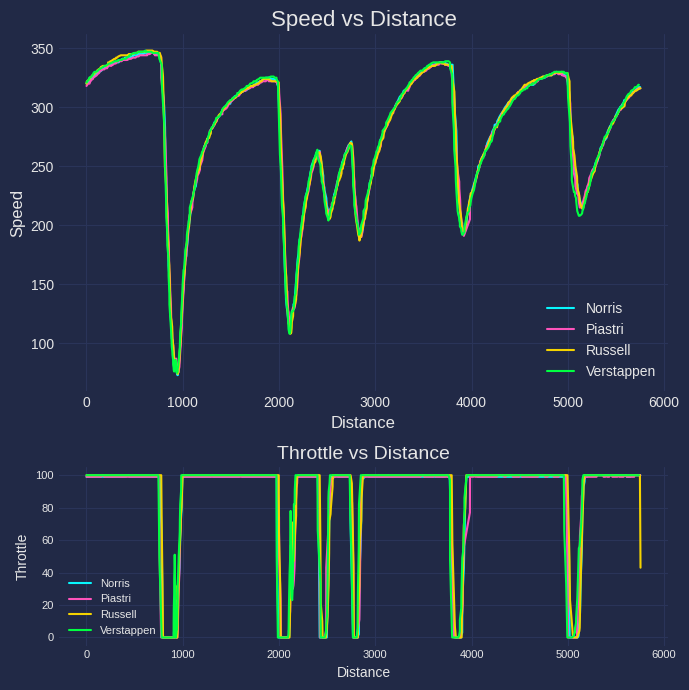

In [20]:
plt.style.use("cyberpunk")
fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(tele_nor.Distance,tele_nor.Speed,label = "Norris")
ax[0].plot(tele_pia.Distance,tele_pia.Speed,label = "Piastri")
ax[0].plot(tele_rus.Distance,tele_rus.Speed,label = "Russell")
ax[0].plot(tele_ver.Distance, tele_ver.Speed, label="Verstappen")
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

ax[1].plot(tele_nor.Distance,tele_nor.Throttle,label = "Norris")
ax[1].plot(tele_pia.Distance,tele_pia.Throttle,label = "Piastri")
ax[1].plot(tele_rus.Distance,tele_rus.Throttle,label = "Russell")
ax[1].plot(tele_ver.Distance, tele_ver.Throttle, label="Verstappen")
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

In [21]:
def convert_to_normal(time):
    if pd.isna(time):
        return time 
    
    time_str = str(time)  
    parts = time_str.split()
    
    days = int(parts[0])
    minutes, seconds_with_microseconds = parts[2].split(':')[1:]
    seconds, microseconds = seconds_with_microseconds.split('.')
    
    minutes = int(minutes)
    seconds = int(seconds)
    microseconds = int(microseconds)
    
    total_microseconds = days * 86400000000 + minutes * 60000000 + seconds * 1000000 + microseconds
    
    minutes, remaining_microseconds = divmod(total_microseconds, 60000000)
    seconds, microseconds = divmod(remaining_microseconds, 1000000)
    
    normal_time = f"{minutes:02d}:{seconds:02d}.{microseconds:06d}"
    return normal_time

In [26]:
driver1_sectors = pd.DataFrame(
    {
        "Driver": ["Vertappen"] * len(ver_sec1),
        "Sector1Time": ver_sec1,
        "Sector2Time": ver_sec2,
        "Sector3Time": ver_sec3,
        "Lap Time": ver_lap_time,
    }
)


driver2_sectors = pd.DataFrame(
    {
        "Driver": ["Russel"] * len(rus_sec1),
        "Sector1Time": rus_sec1,
        "Sector2Time": rus_sec2,
        "Sector3Time": rus_sec3,
        "Lap Time": rus_lap_time,
    }
)

driver3_sectors = pd.DataFrame(
    {
        "Driver": ["Norris"] * len(nor_sec1),
        "Sector1Time": nor_sec1,
        "Sector2Time": nor_sec2,
        "Sector3Time": nor_sec3,
        "Lap Time": nor_lap_time,
    }
)

driver4_sectors = pd.DataFrame(
    {
        "Driver": ["Piastri"] * len(pia_sec1),
        "Sector1Time": pia_sec1,
        "Sector2Time": pia_sec2,
        "Sector3Time": pia_sec3,
        "Lap Time": pia_lap_time,
    }
)


all_drivers_sectors = pd.concat(
    [driver1_sectors,driver2_sectors, driver3_sectors, driver4_sectors],
    ignore_index=True,
)
all_drivers_sectors["Sector1Time"] = all_drivers_sectors["Sector1Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector2Time"] = all_drivers_sectors["Sector2Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Sector3Time"] = all_drivers_sectors["Sector3Time"].apply(
    convert_to_normal
)
all_drivers_sectors["Lap Time"] = all_drivers_sectors["Lap Time"].apply(
    convert_to_normal
)
all_drivers_sectors.sort_values(
    by=["Sector1Time", "Sector2Time", "Sector3Time"], ascending=True
)
all_drivers_sectors.dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
1,Vertappen,00:26.605000,00:26.993000,00:26.628000,01:20.226000
2,Vertappen,00:36.172000,00:40.036000,00:40.694000,01:56.902000
4,Vertappen,00:26.510000,00:26.882000,00:29.420000,01:22.812000
5,Vertappen,00:36.275000,00:33.038000,00:39.386000,01:48.699000
7,Vertappen,00:26.442000,00:26.853000,00:26.579000,01:19.874000
8,Vertappen,00:35.389000,00:36.646000,00:43.827000,01:55.862000
10,Vertappen,00:26.389000,00:26.656000,00:26.617000,01:19.662000
11,Vertappen,00:33.477000,00:36.192000,00:41.009000,01:50.678000
13,Vertappen,00:26.391000,00:26.798000,00:26.883000,01:20.072000
14,Vertappen,00:31.210000,00:31.780000,00:36.716000,01:39.706000


*Race*

In [38]:
race = f1.get_session(2024,"MOnza","R")
race.load()

core           INFO 	Loading data for Italian Grand Prix - Race [v3.3.9]
req            INFO 	No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for session_status_data. Loading data...
_api           INFO 	Fetching session status data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for lap_count. Loading data...
_api           INFO 	Fetching lap count data...
req            INFO 	Data has been written to cache!
req            INFO 	No cached data found for track_status_data. Loading data...
_api           INFO 	Fetching track status data...
req            INFO 	Data has been written to cache!
req            INFO 	No ca

In [39]:
race.results.loc[:,["Abbreviation","TeamName","GridPosition","Position","Time","Status"]]

,Abbreviation,TeamName,GridPosition,Position,Time,Status
16,LEC,Ferrari,4.0,1.0,0 days 01:14:40.727000,Finished
81,PIA,McLaren,2.0,2.0,0 days 00:00:02.664000,Finished
4,NOR,McLaren,1.0,3.0,0 days 00:00:06.153000,Finished
55,SAI,Ferrari,5.0,4.0,0 days 00:00:15.621000,Finished
44,HAM,Mercedes,6.0,5.0,0 days 00:00:22.820000,Finished
1,VER,Red Bull Racing,7.0,6.0,0 days 00:00:37.932000,Finished
63,RUS,Mercedes,3.0,7.0,0 days 00:00:39.715000,Finished
11,PER,Red Bull Racing,8.0,8.0,0 days 00:00:54.148000,Finished
23,ALB,Williams,9.0,9.0,0 days 00:01:07.456000,Finished
20,MAG,Haas F1 Team,13.0,10.0,0 days 00:01:08.302000,Finished


In [40]:
laps = race.laps
laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:57:18.965000,LEC,16,0 days 00:01:28.179000,1.0,1.0,NaT,NaT,NaT,0 days 00:00:29.989000,...,True,Ferrari,0 days 00:55:50.494000,2024-09-01 13:03:34.413,1,2.0,False,,False,False
1,0 days 00:58:44.361000,LEC,16,0 days 00:01:25.396000,2.0,1.0,NaT,NaT,0 days 00:00:27.707000,0 days 00:00:29.265000,...,True,Ferrari,0 days 00:57:18.965000,2024-09-01 13:05:02.884,1,2.0,False,,False,True
2,0 days 01:00:09.540000,LEC,16,0 days 00:01:25.179000,3.0,1.0,NaT,NaT,0 days 00:00:27.679000,0 days 00:00:29.001000,...,True,Ferrari,0 days 00:58:44.361000,2024-09-01 13:06:28.280,1,2.0,False,,False,True
3,0 days 01:01:34.350000,LEC,16,0 days 00:01:24.810000,4.0,1.0,NaT,NaT,0 days 00:00:27.653000,0 days 00:00:28.883000,...,True,Ferrari,0 days 01:00:09.540000,2024-09-01 13:07:53.459,1,2.0,False,,False,True
4,0 days 01:02:58.953000,LEC,16,0 days 00:01:24.603000,5.0,1.0,NaT,NaT,0 days 00:00:27.630000,0 days 00:00:28.790000,...,True,Ferrari,0 days 01:01:34.350000,2024-09-01 13:09:18.269,1,2.0,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,0 days 01:00:20.224000,TSU,22,0 days 00:01:26.665000,3.0,1.0,NaT,NaT,0 days 00:00:27.756000,0 days 00:00:29.819000,...,False,RB,0 days 00:58:53.559000,2024-09-01 13:06:37.478,1,15.0,False,,False,True
1004,0 days 01:01:46.422000,TSU,22,0 days 00:01:26.198000,4.0,1.0,NaT,NaT,0 days 00:00:27.631000,0 days 00:00:29.689000,...,False,RB,0 days 01:00:20.224000,2024-09-01 13:08:04.143,1,15.0,False,,False,True
1005,0 days 01:03:18.663000,TSU,22,0 days 00:01:32.241000,5.0,1.0,NaT,NaT,0 days 00:00:28.736000,0 days 00:00:32.722000,...,False,RB,0 days 01:01:46.422000,2024-09-01 13:09:30.341,1,19.0,True,TRACK LIMITS AT TURN 2 LAP 5,False,True
1006,0 days 01:04:47.136000,TSU,22,0 days 00:01:28.473000,6.0,1.0,NaT,NaT,0 days 00:00:28.426000,0 days 00:00:30.441000,...,False,RB,0 days 01:03:18.663000,2024-09-01 13:11:02.582,1,19.0,False,,False,True


In [56]:
lec_race = race.laps.pick_driver("LEC")
fastest_lap_lec_race = lec_race.pick_fastest().LapTime
lec_race_lap_time = lec_race["LapTime"]
lec_race_sec1 = lec_race["Sector1Time"]
lec_race_sec2 = lec_race["Sector2Time"]
lec_race_sec3 = lec_race["Sector3Time"]
print("Fastest Lap:",convert_to_normal(fastest_lap_lec_race),"which was in Lap number",lec_race.pick_fastest().LapNumber)
lec_race.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:23.226000 which was in Lap number 33.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
0,0 days 00:01:28.179000,NaT,0 days 00:00:29.989000,0 days 00:00:28.398000,316.0,313.0,311.0,300.0
1,0 days 00:01:25.396000,0 days 00:00:27.707000,0 days 00:00:29.265000,0 days 00:00:28.424000,315.0,325.0,312.0,325.0
2,0 days 00:01:25.179000,0 days 00:00:27.679000,0 days 00:00:29.001000,0 days 00:00:28.499000,313.0,324.0,313.0,328.0
3,0 days 00:01:24.810000,0 days 00:00:27.653000,0 days 00:00:28.883000,0 days 00:00:28.274000,314.0,324.0,312.0,327.0
4,0 days 00:01:24.603000,0 days 00:00:27.630000,0 days 00:00:28.790000,0 days 00:00:28.183000,313.0,325.0,312.0,321.0


In [44]:
fastest_lap_race_lec = lec_race.pick_fastest()
tele_race_lec= fastest_lap_race_lec.get_telemetry().add_distance()
speed_race_lec = tele_race_lec.Speed
tele_race_lec.loc[:,["Speed","nGear","RPM"]]

,Speed,nGear,RPM
2,316,8,11242
3,316,8,11263
4,317,8,11305
5,318,8,11369
6,320,8,11433
...,...,...,...
616,314,8,11177
617,314,8,11227
618,315,8,11278
619,316,8,11287


In [54]:
pia_race = race.laps.pick_driver("PIA")
fastest_lap_pia_race = pia_race.pick_fastest().LapTime
pia_race_lap_time = pia_race["LapTime"]
pia_race_sec1 = pia_race["Sector1Time"]
pia_race_sec2 = pia_race["Sector2Time"]
pia_race_sec3 = pia_race["Sector3Time"]
print("Fastest Lap:",convert_to_normal(fastest_lap_pia_race),"which was in Lap number",pia_race.pick_fastest().LapNumber)
pia_race.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:21.943000 which was in Lap number 53.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
53,0 days 00:01:27.623000,NaT,0 days 00:00:30.021000,0 days 00:00:28.254000,327.0,304.0,309.0,292.0
54,0 days 00:01:25.116000,0 days 00:00:27.751000,0 days 00:00:29.311000,0 days 00:00:28.054000,315.0,312.0,309.0,320.0
55,0 days 00:01:25.261000,0 days 00:00:27.670000,0 days 00:00:29.271000,0 days 00:00:28.320000,313.0,310.0,309.0,NaN
56,0 days 00:01:24.695000,0 days 00:00:27.672000,0 days 00:00:28.825000,0 days 00:00:28.198000,310.0,310.0,308.0,317.0
57,0 days 00:01:24.660000,0 days 00:00:27.702000,0 days 00:00:28.906000,0 days 00:00:28.052000,308.0,309.0,309.0,NaN


In [46]:
fastest_lap_race_pia = pia_race.pick_fastest()
tele_race_pia= fastest_lap_race_pia.get_telemetry().add_distance()
speed_race_pia = tele_race_pia.Speed
tele_race_pia.loc[:,["Speed","nGear","RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,317,8,11238
3,318,8,11259
4,319,8,11302
5,321,8,11319
6,321,8,11331
...,...,...,...
630,313,8,11108
631,315,8,11155
632,317,8,11202
633,318,8,11229


In [55]:
nor_race = race.laps.pick_driver("NOR")
fastest_lap_nor_race = nor_race.pick_fastest().LapTime
nor_race_lap_time = nor_race["LapTime"]
nor_race_sec1 = nor_race["Sector1Time"]
nor_race_sec2 = nor_race["Sector2Time"]
nor_race_sec3 = nor_race["Sector3Time"]
print("Fastest Lap:",convert_to_normal(fastest_lap_nor_race),"which was in Lap number",nor_race.pick_fastest().LapNumber)
nor_race.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:21.432000 which was in Lap number 53.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
106,0 days 00:01:28.971000,NaT,0 days 00:00:31.051000,0 days 00:00:28.624000,319.0,312.0,312.0,285.0
107,0 days 00:01:25.458000,0 days 00:00:27.676000,0 days 00:00:29.408000,0 days 00:00:28.374000,309.0,332.0,313.0,339.0
108,0 days 00:01:25.110000,0 days 00:00:27.513000,0 days 00:00:29.381000,0 days 00:00:28.216000,313.0,323.0,312.0,327.0
109,0 days 00:01:25.168000,0 days 00:00:27.638000,0 days 00:00:29.468000,0 days 00:00:28.062000,312.0,315.0,312.0,323.0
110,0 days 00:01:24.674000,0 days 00:00:27.524000,0 days 00:00:29.143000,0 days 00:00:28.007000,314.0,317.0,313.0,322.0


In [48]:
fastest_lap_race_nor = nor_race.pick_fastest()
tele_race_nor= fastest_lap_race_nor.get_telemetry().add_distance()
speed_race_nor = tele_race_nor.Speed
tele_race_nor.loc[:,["Speed","nGear","RPM"]]

,Speed,nGear,RPM
2,319,8,11282
3,320,8,11304
4,321,8,11348
5,321,8,11390
6,322,8,11393
...,...,...,...
624,316,8,11118
625,316,8,11178
626,317,8,11238
627,317,8,11244


In [52]:
ver_race = race.laps.pick_driver("VER")
fastest_lap_ver_race = ver_race.pick_fastest().LapTime
ver_race_lap_time = ver_race["LapTime"]
ver_race_sec1 = ver_race["Sector1Time"]
ver_race_sec2 = ver_race["Sector2Time"]
ver_race_sec3 = ver_race["Sector3Time"]
print("Fastest Lap:",convert_to_normal(fastest_lap_ver_race),"which was in Lap number",ver_race.pick_fastest().LapNumber)
ver_race.loc[:,["LapTime","Sector1Time","Sector2Time","Sector3Time","SpeedI1","SpeedI2","SpeedFL","SpeedST"]].head()

Fastest Lap: 01:21.745000 which was in Lap number 43.0


,LapTime,Sector1Time,Sector2Time,Sector3Time,SpeedI1,SpeedI2,SpeedFL,SpeedST
265,0 days 00:01:30.354000,NaT,0 days 00:00:31.144000,0 days 00:00:28.856000,327.0,316.0,312.0,298.0
266,0 days 00:01:26.170000,0 days 00:00:28.048000,0 days 00:00:29.474000,0 days 00:00:28.648000,315.0,334.0,311.0,316.0
267,0 days 00:01:25.855000,0 days 00:00:27.731000,0 days 00:00:29.496000,0 days 00:00:28.628000,314.0,332.0,312.0,321.0
268,0 days 00:01:25.633000,0 days 00:00:27.884000,0 days 00:00:29.335000,0 days 00:00:28.414000,313.0,318.0,312.0,317.0
269,0 days 00:01:25.218000,0 days 00:00:27.721000,0 days 00:00:29.220000,0 days 00:00:28.277000,NaN,318.0,312.0,NaN


In [57]:
fastest_lap_race_ver = ver_race.pick_fastest()
tele_race_ver= fastest_lap_race_ver.get_telemetry().add_distance()
speed_race_ver = tele_race_ver.Speed
tele_race_ver.loc[:,["Speed","nGear","RPM"]]

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


,Speed,nGear,RPM
2,316,8,11222
3,317,8,11240
4,317,8,11275
5,318,8,11310
6,319,8,11346
...,...,...,...
629,304,8,10863
630,304,8,10858
631,304,8,10853
632,304,8,10849


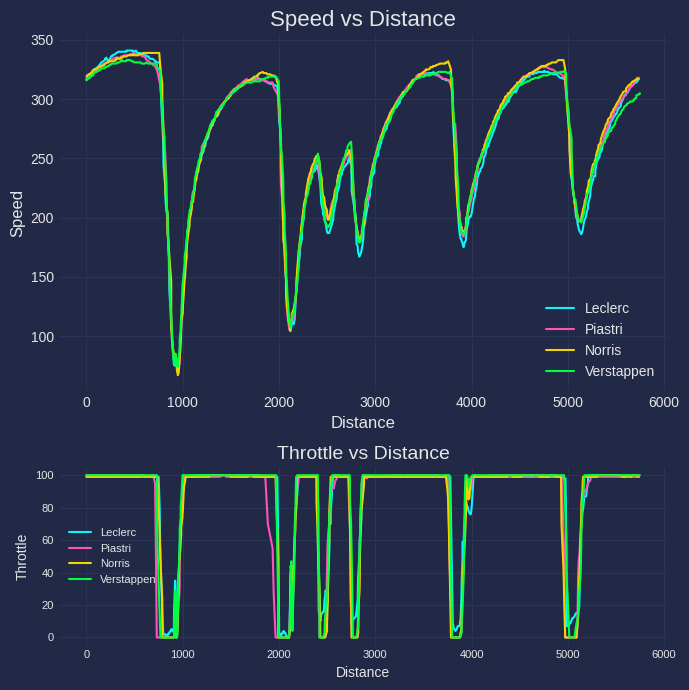

In [58]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7), height_ratios=[2, 1])

ax[0].plot(tele_race_lec.Distance, tele_race_lec.Speed, label="Leclerc")
ax[0].plot(tele_race_pia.Distance, tele_race_pia.Speed, label="Piastri")
ax[0].plot(tele_race_nor.Distance,tele_race_nor.Speed,label = "Norris")
ax[0].plot(tele_race_ver.Distance,tele_race_ver.Speed,label = "Verstappen")
ax[0].set_title("Speed vs Distance", fontsize=16)
ax[0].set_xlabel("Distance", fontsize=12)
ax[0].set_ylabel("Speed", fontsize=12)
ax[0].legend(fontsize=10)
ax[0].grid(True)
ax[0].tick_params(axis='both', which='major', labelsize=10)

ax[1].plot(tele_race_lec.Distance, tele_race_lec.Throttle, label="Leclerc")
ax[1].plot(tele_race_pia.Distance, tele_race_pia.Throttle, label="Piastri")
ax[1].plot(tele_race_nor.Distance,tele_race_nor.Throttle,label = "Norris")
ax[1].plot(tele_race_ver.Distance,tele_race_ver.Throttle,label = "Verstappen")
ax[1].set_title("Throttle vs Distance", fontsize=14)
ax[1].set_xlabel("Distance", fontsize=10)
ax[1].set_ylabel("Throttle", fontsize=10)
ax[1].legend(fontsize=8)
ax[1].grid(True)
ax[1].tick_params(axis='both', which='major', labelsize=8)

plt.tight_layout()
plt.show()

In [60]:
driver1_sectors = pd.DataFrame({
    'Driver': ['Leclerc'] * len(lec_race_sec1),
    'Sector1Time': lec_race_sec1,
    'Sector2Time': lec_race_sec2,
    'Sector3Time': lec_race_sec3,
    'Lap Time' : lec_race_lap_time
})

driver2_sectors = pd.DataFrame({
    'Driver': ['Piastri'] * len(pia_race_sec1),
    'Sector1Time': pia_race_sec1,
    'Sector2Time': pia_race_sec2,
    'Sector3Time': pia_race_sec3,
    'Lap Time' : pia_race_lap_time
})

driver3_sectors = pd.DataFrame({
    'Driver': ['Norris'] * len(nor_race_sec1),
    'Sector1Time': nor_race_sec1,
    'Sector2Time': nor_race_sec2,
    'Sector3Time': nor_race_sec3,
    'Lap Time' : nor_race_lap_time
})

driver4_sectors = pd.DataFrame({
    'Driver': ['Verstappen'] * len(ver_race_sec1),
    'Sector1Time': ver_race_sec1,
    'Sector2Time': ver_race_sec2,
    'Sector3Time': ver_race_sec3,
    'Lap Time' : ver_race_lap_time
})



all_drivers_sectors = pd.concat([driver1_sectors, driver2_sectors, driver3_sectors, driver4_sectors], ignore_index=True)
all_drivers_sectors['Sector1Time'] = all_drivers_sectors['Sector1Time'].apply(convert_to_normal)
all_drivers_sectors['Sector2Time'] = all_drivers_sectors['Sector2Time'].apply(convert_to_normal)
all_drivers_sectors['Sector3Time'] = all_drivers_sectors['Sector3Time'].apply(convert_to_normal)
all_drivers_sectors['Lap Time'] = all_drivers_sectors['Lap Time'].apply(convert_to_normal)
all_drivers_sectors.sort_values(by=["Sector1Time","Sector2Time","Sector3Time"],ascending=True).dropna()

,Driver,Sector1Time,Sector2Time,Sector3Time,Lap Time
201,Verstappen,00:26.877000,00:27.614000,00:27.254000,01:21.745000
146,Norris,00:26.936000,00:28.051000,00:27.247000,01:22.234000
153,Norris,00:26.970000,00:27.880000,00:26.974000,01:21.824000
95,Piastri,00:27.087000,00:27.800000,00:27.205000,01:22.092000
96,Piastri,00:27.098000,00:28.121000,00:27.409000,01:22.628000
...,...,...,...,...,...
120,Norris,00:47.124000,00:28.866000,00:27.850000,01:43.840000
91,Piastri,00:47.532000,00:28.366000,00:27.540000,01:43.438000
138,Norris,00:47.623000,00:28.605000,00:27.845000,01:44.073000
15,Leclerc,00:47.985000,00:28.750000,00:28.153000,01:44.888000


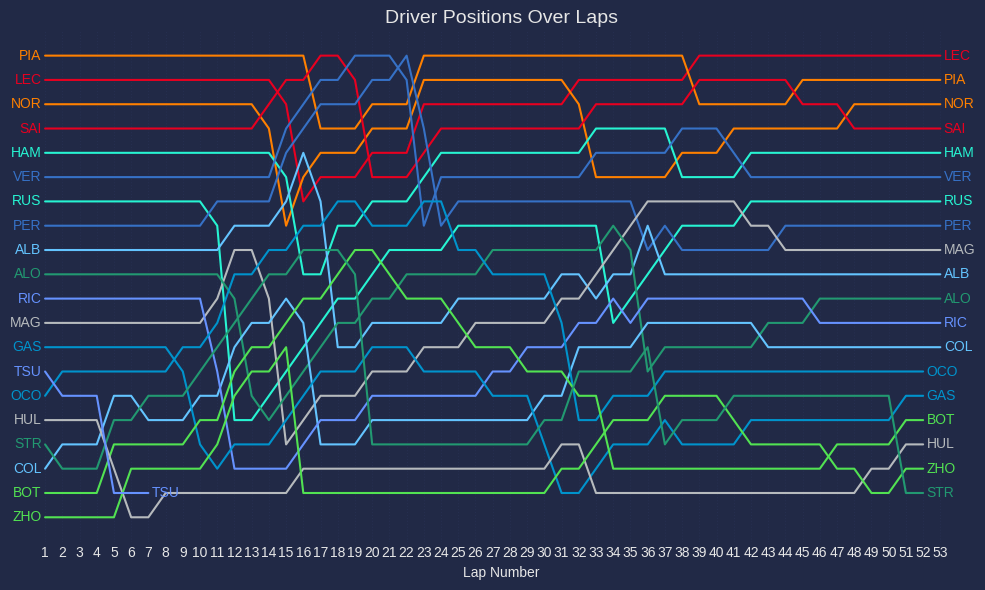

In [73]:
# Helper function to convert hex color to RGB tuple
def hex_to_rgb(hex_color):
    hex_color = hex_color.lstrip('#')  # Remove '#' if present
    return tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (0, 2, 4))

# Get unique drivers and total number of laps
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
nlaps = int(race.laps.LapNumber.unique().max())

# Initialize an empty dictionary to store team colors
team_colors = {}

# Fetch the team color for each driver dynamically and convert to RGB
for driver in drivers_ab:
    driver_object = quali.get_driver(driver)
    hex_color = driver_object.TeamColor
    team_colors[driver] = hex_to_rgb(hex_color)

# Plot each driver's positions with their team color
plt.figure(figsize=(10, 6))  # Adjust figure size
for driver in drivers_ab:
    positions = laps[laps['Driver'] == driver]['Position'].values  
    color = team_colors.get(driver, (0.5, 0.5, 0.5))  # Default to gray if no color is specified
    plt.plot(range(1, len(positions) + 1), positions, label=driver, color=color)
    
    # Annotate driver name at the start of the line
    plt.text(
        1 - 0.2,  # Slightly to the left of the first lap
        positions[0],  # Y-coordinate of the first position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='right'  # Align text to the right of the point
    )
    
    # Annotate driver name at the end of the line
    plt.text(
        len(positions) + 0.2,  # Slightly to the right of the last lap
        positions[-1],  # Y-coordinate of the last position
        driver,  # Driver's name
        color=color,  # Use the driver's color
        fontsize=10,  # Font size
        verticalalignment='center',  # Center the text vertically
        horizontalalignment='left'  # Align text to the left of the point
    )

# Add plot title and labels
plt.title("Driver Positions Over Laps", fontsize=14)
plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(0.5, float(nlaps) + 1.5)  # Extend x-axis to leave space for annotations
plt.xlabel("Lap Number")
plt.ylim(0, 21)
plt.gca().invert_yaxis()  # Invert y-axis so positions are ranked correctly
plt.gca().set_yticks([])
plt.xticks(range(1, nlaps + 1))
plt.tight_layout()
plt.show()

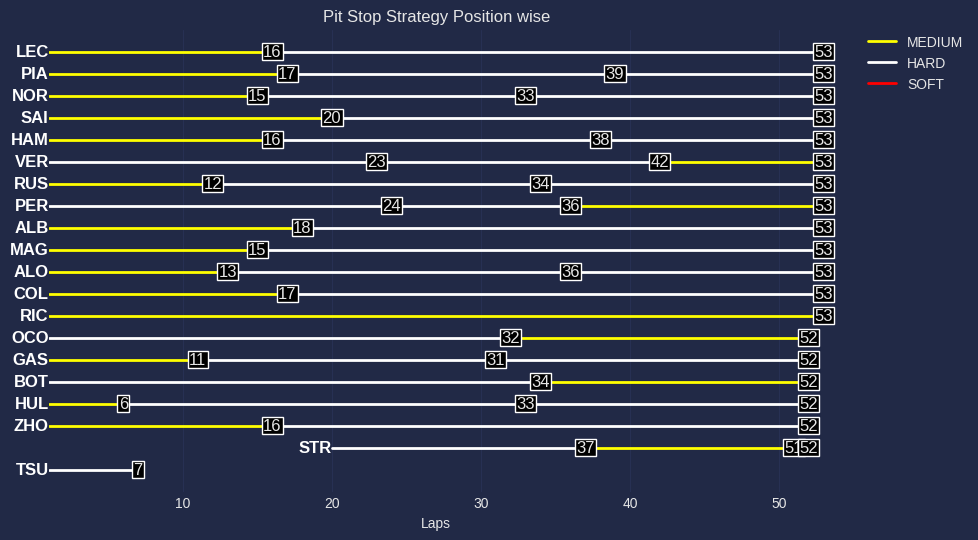

In [78]:
def getDriverPosition(abbreviation: str):
    res = race.results
    c = res["Abbreviation"] == abbreviation
    pos = res.loc[c, ["Position"]]
    posi = pos.iloc[-1]
    return int(posi.iloc[0])


def getCompound(abbreviation: str):
    driver_race = race.laps.pick_driver(abbreviation)
    lastLap = driver_race.LapNumber.count()
    if driver_race["TyreLife"].iloc[0] == 1.0:
        condition = driver_race["TyreLife"] == 1
        driver_comp = driver_race.loc[condition, ["Compound", "LapNumber"]]
        compound = driver_comp.Compound.tolist()
        return compound, driver_comp, lastLap
    else:
        compound = []
        result = []
        for i in range(0, len(driver_race["TyreLife"])):
            if driver_race["TyreLife"].iloc[i] < driver_race["TyreLife"].iloc[i - 1]:
                result.append(
                    {
                        "Compound": driver_race["Compound"].iloc[i],
                        "LapNumber": driver_race["LapNumber"].iloc[i],
                    }
                )
                compound.append(driver_race["Compound"].iloc[i])

        driver_comp = pd.DataFrame(result)
        return compound, driver_comp, lastLap


fig, ax = plt.subplots(figsize=(10, 6))

color_mapping = {
    "MEDIUM": "yellow",
    "SOFT": "red",
    "HARD": "white",
    "INTERMEDIATE": "green",
    "WET": "blue",
}
drivers = race.laps.Driver.unique()
drivers_ab = drivers.tolist()
used_labels = set()
for driver in drivers_ab:
    compound, driver_comp, lastLap = getCompound(driver)

    list1 = driver_comp.LapNumber.tolist()
    list1.append(lastLap)
    int_list = [int(x) for x in list1]
    x_points = int_list
    n = len(int_list)
    posi = getDriverPosition(driver)
    y_points = [posi] * n

    for i in range(len(driver_comp.LapNumber)):
        x_segment = [x_points[i], x_points[i + 1]]
        y_segment = [y_points[i], y_points[i + 1]]
        tire_color = color_mapping.get(compound[i], "unknown")
        label = compound[i] if compound[i] not in used_labels else None
        
        ax.plot(x_segment, y_segment, color=tire_color, linewidth=2, label=label)
        used_labels.add(compound[i])

        ax.text(
            x_points[i + 1],
            y_points[i + 1],
            str(x_points[i + 1]),
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", edgecolor="white", pad=1),
        )
        ax.annotate(f'{i}',
                xy=(0, 1),
                xytext=(-10, 0),
                textcoords='offset points',
                va='center',
                ha='right',
                color="white",
                fontweight='bold')
    ax.text(
        x_points[0], 
        y_points[0], 
        driver, 
        fontsize=12, 
        ha='right', 
        va='center', 
        color="white", 
        fontweight='bold',
    )
    
ax.set_xlim(1, 53)
ax.invert_yaxis()
ax.set_ylim(21, 0)
ax.set_title("Pit Stop Strategy Position wise")
ax.set_xlabel("Laps")
plt.gca().set_yticks([])
ax.axvline(x=0, color='black', linewidth=2)
ax.grid(True, linestyle="-", alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0.0)
plt.show()


In [79]:
res = race.results
drivers = res['Abbreviation'].tolist()
fastest_speed = pd.DataFrame(columns=['Driver', 'Speed'])
for i in drivers:
    tele = race.laps.pick_driver(i)
    speed = tele.SpeedST.max()
    df = pd.DataFrame({'Driver': [i], 'Speed': [speed]})
    fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)
fastest_speed.sort_values(by="Speed",ascending=True)
    

/tmp/ipykernel_55265/2770152713.py:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fastest_speed = pd.concat([fastest_speed, df], ignore_index=True)


,Driver,Speed
0,LEC,338.0
5,VER,338.0
3,SAI,340.0
4,HAM,340.0
1,PIA,342.0
8,ALB,348.0
14,GAS,348.0
6,RUS,349.0
7,PER,351.0
13,OCO,351.0


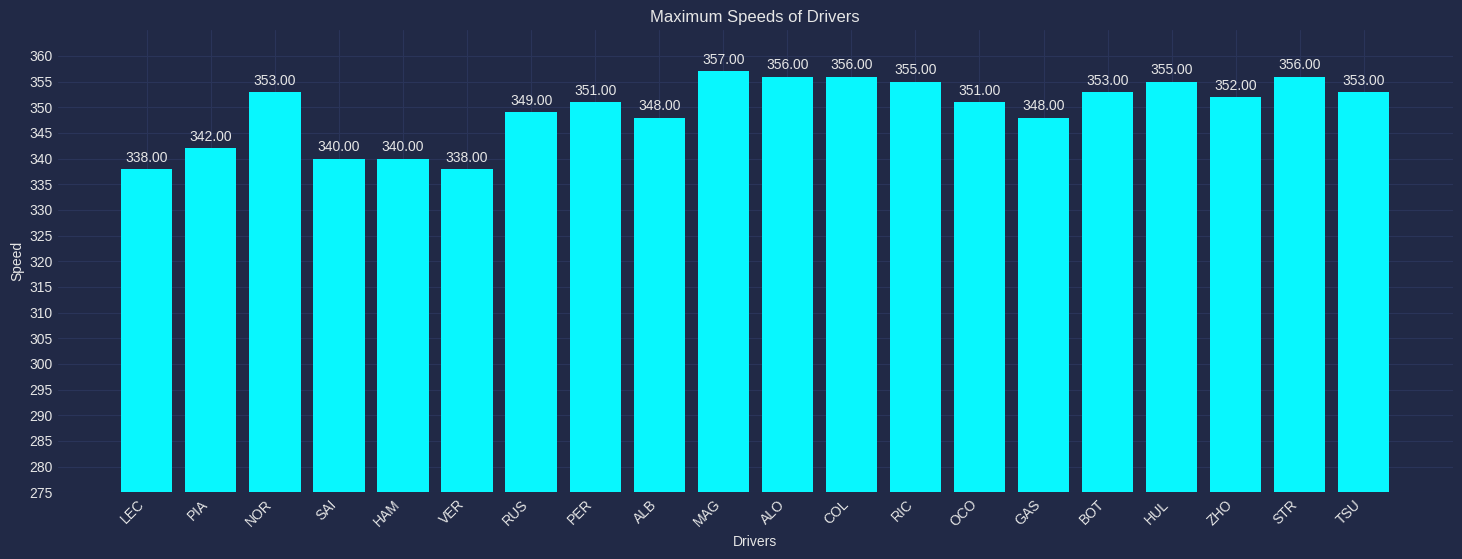

In [80]:
fig,ax = plt.subplots(figsize=(18, 6))


bars = ax.bar(fastest_speed['Driver'], fastest_speed['Speed'])

ax.set_xlabel('Drivers')

ax.set_ylabel('Speed')

ax.set_title('Maximum Speeds of Drivers')

plt.xticks(rotation=45, ha='right')

y_min = 275
y_max = np.ceil(fastest_speed['Speed'].max() / 5) * 5 + 5
y_ticks = np.arange(y_min, y_max, 5)
ax.set_ylim(y_min, y_max)
ax.set_yticks(y_ticks)

for bar in bars:
    height = bar.get_height()
    ax.annotate('{:.2f}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Display the plot
plt.show()

In [82]:
plotting.setup_mpl()

In [92]:
laps_lec = laps.pick_driver("LEC")
laps_ver = laps.pick_driver("VER")

fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_lec = laps_lec.pick_fastest().get_telemetry().add_distance()

fastest_lec["Driver"] = "LEC"
fastest_ver["Driver"] = "VER"
telemetry = pd.concat([fastest_lec,fastest_ver])

core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [93]:
num_minisectors = 25

total_distance = total_distance = max(telemetry['Distance'])

minisector_length = total_distance / num_minisectors

In [94]:
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))

In [95]:

telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)

In [96]:
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
average_speed

,Minisector,Driver,Speed
0,1,LEC,326.521739
1,1,VER,322.285714
2,2,LEC,338.941176
3,2,VER,331.142857
4,3,LEC,337.476190
5,3,VER,330.700000
6,4,LEC,190.294118
7,4,VER,191.470588
8,5,LEC,130.208333
9,5,VER,138.145833


In [97]:
# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})


In [98]:

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'LEC', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 2

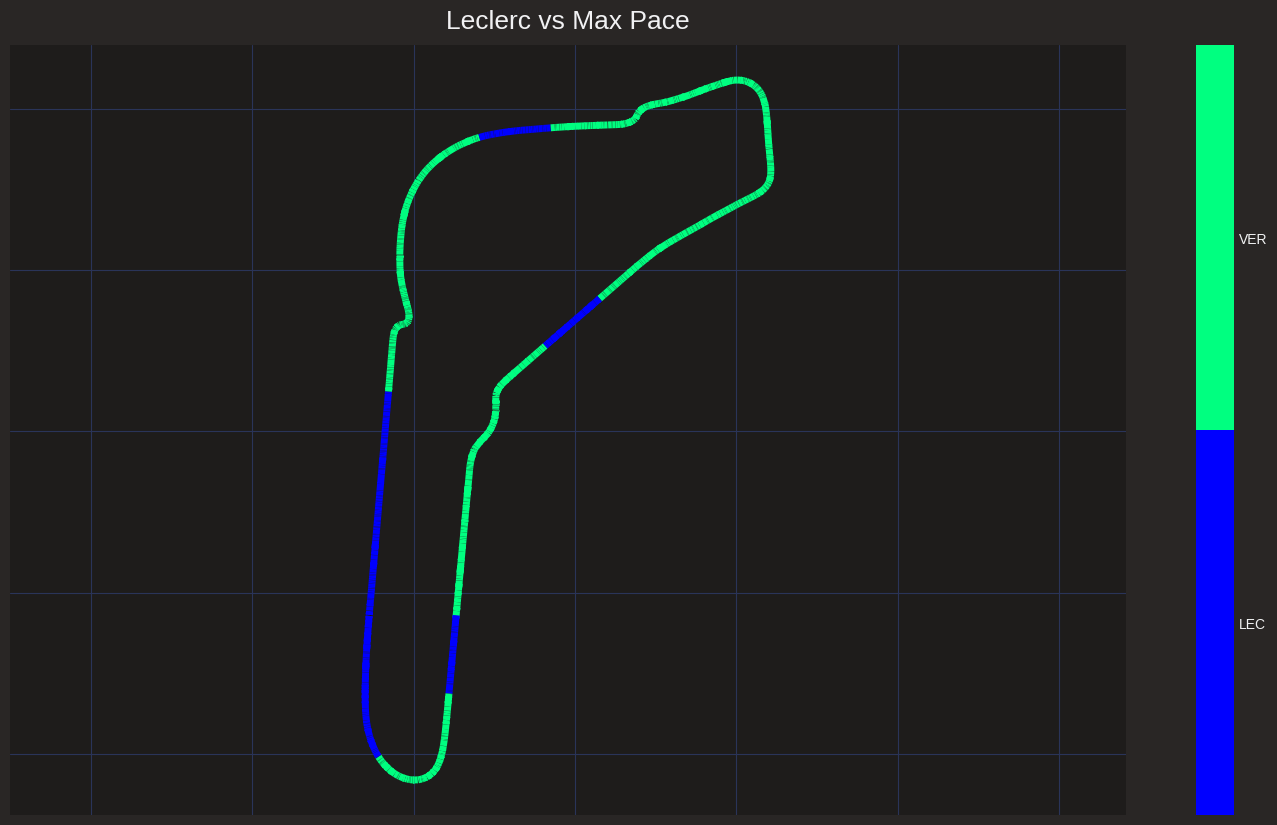

In [106]:
x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = plt.get_cmap('winter', 2)  # Create a colormap with 2 colors
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]
plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

# Adjust the colorbar settings
cbar = plt.colorbar(mappable=lc_comp, boundaries=[1, 2, 3])
cbar.set_ticks([1.5, 2.5])
cbar.set_ticklabels(['LEC', 'VER'])
plt.title("Leclerc vs Max Pace")
plt.show()
